In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.rename({'Content Rating':'Content_Rating','Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver'},axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

#  1. Data clean up – Missing value treatment

# a. Drop records where rating is missing since rating is our target/study variable

In [7]:
df['Rating'].isna().sum()

1474

In [8]:
df[df['Rating'].isna()].index

Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,   185,
       ...
       10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835, 10838],
      dtype='int64', length=1474)

In [9]:
df.drop(index=df[df['Rating'].isna()].index, inplace=True)

In [10]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       3
dtype: int64

# b. Check the null values for the Android Ver column

In [11]:
df[df['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# i. Are all 3 records having the same problem?

# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [12]:
df.drop([10472],inplace=True)

In [13]:
df[df['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


# iii. Replace remaining missing values with the mode

In [14]:
df['Android_Ver'].fillna(df['Android_Ver'].mode()[0],inplace=True)

In [15]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       0
dtype: int64

# c. Current ver – replace with most common value

In [16]:
df['Current_Ver'].fillna(df['Current_Ver'].mode()[0], inplace=True)

In [17]:
df[df['Current_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


# 2. Data clean up – correcting the data types
 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


# a. Which all variables need to be brought to numeric types?

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


From this information, we can see that, the column Reviews, Installs and Price have the numeric data so we can convert
these columns into the numeric types, but there are also 2 columns which are Current Ver and Android Ver can be conevert
into the numeric type but in those columnn there are some strig values which we can drop it or replace it

# b. Price variable – remove $ sign and convert to float

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [22]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [25]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace('+',''))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


# d. Convert all other identified columns to numeric

From the given info, we have already converted the identifies columns into the numeric type so now, there are no such 
columns which we need to convert to numeric type

# 3. Sanity checks – check for the following and handle accordingly

# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

# i. Are there any such records? Drop if so.

In [27]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


There are no such records which have rating greater than 5, so we don't need to drop anything from the given dataset 

# b. Reviews should not be more than installs as only those who installed can review the app.

In [28]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [30]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [31]:
sum(df['Reviews']>df['Installs'])

7

# i. Are there any such records? Drop if so.


In [32]:
df.drop(index=df[df['Reviews']>df['Installs']].index,inplace=True)

In [33]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


# 4. Identify and handle outliers 

# a. Price column


# i. Make suitable plot to identify outliers in price

<Axes: >

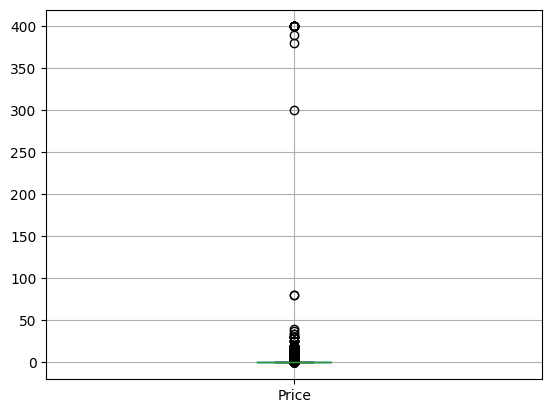

In [34]:
df.boxplot('Price')

# ii. Do you expect apps on the play store to cost $200? Check out these cases


In [35]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [36]:
sum(df['Price']>200)

15

In [37]:
df.drop(index=df[df['Price']>200].index,inplace=True)

In [38]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


# iii. After dropping the useless records, make the suitable plot again to identify outliers

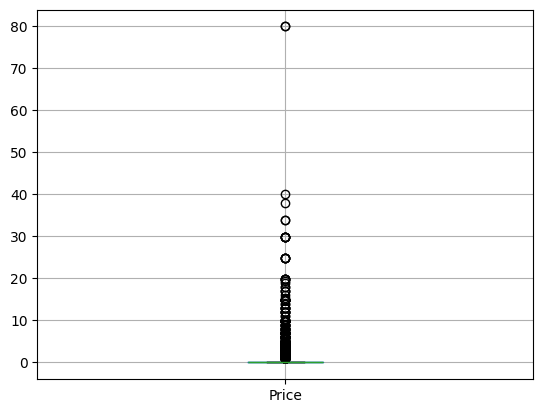

In [39]:
df.boxplot('Price')
plt.show()

# iv. Limit data to records with price < $30


In [40]:
df[df['Price']<30].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       10828, 10829, 10830, 10832, 10833, 10834, 10836, 10837, 10839, 10840],
      dtype='int64', length=9338)

In [41]:
sum(df['Price']<30)

9338

# b. Reviews column
# i. Make suitable plot

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


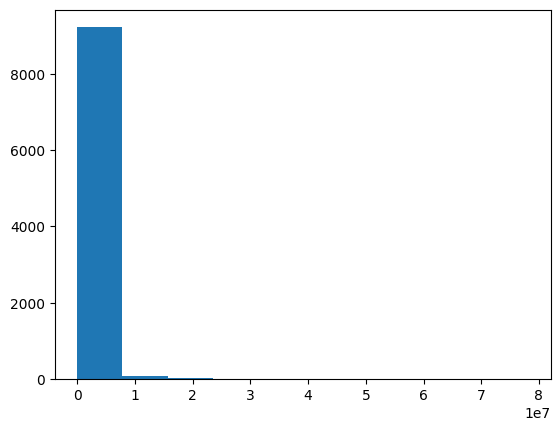

In [43]:
plt.hist(df['Reviews'])
plt.show()

# ii. Limit data to apps with < 1 Million reviews


In [44]:
df[df['Reviews']<1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [45]:
sum(df['Reviews']<1000000)

8640

# c. Installs
# i. What is the 95th percentile of the installs?


In [46]:
df['Installs'].quantile(0.95)

100000000.0

# ii. Drop records having a value more than the 95th percentile


In [47]:
df[df['Installs']>df['Installs'].quantile(0.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70M,500000000,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


In [48]:
df[df['Installs']>df['Installs'].quantile(0.95)].index

Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
       ...
       4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
      dtype='int64', length=130)

In [49]:
df.drop(index=df[df['Installs']>df['Installs'].quantile(0.95)].index,inplace=True)

In [50]:
df[df['Installs']>df['Installs'].quantile(0.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35M,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35M,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,Varies with device,100000000,Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10253,File Commander - File Manager/Explorer,BUSINESS,4.3,758590,12M,100000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,4.1 and up
10327,Garena Free Fire,GAME,4.5,5534114,53M,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,Varies with device,100000000,Free,0.0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

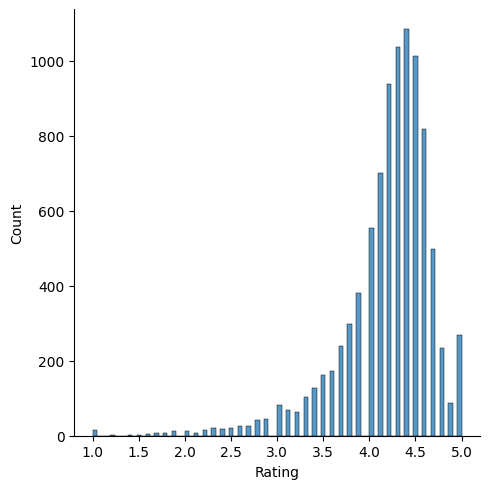

In [51]:
sns.displot(df.Rating)
plt.show()

# a. How do you explain this?

So, from the above plot we can see that the skewed value is at the left side which is negative, so we can say that the given column or the given plot is left skewed

# b. What is the implication of this on your analysis?

If we have more data then generally there is skewed value present in that dataset.And if there is too many skewed values present in the dataset that is too much skewness present in the column then whatever the model we have, it does't work properly (Statistical Model) So, if we have skewness data and if it's at the right side then it is right skewed data and if the skewness is at the left side then it is left skewed data that is ther are negative values So, to overcome from this and to get the right output from the analysis we can remove this skewness and we can convert it into the bell curve that is the mean is at the centre

# 6. What are the top Content Rating values?

In [52]:
df['Content_Rating'].value_counts()

Content_Rating
Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

# a. Are there any values with very few records?

In [53]:
df['Content_Rating'].value_counts()

Content_Rating
Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

after we analysis we found the Adults only 18+ and unrated those have very few records that is 3 and 1

# b. If yes, drop those as they won’t help in the analysis


In [54]:
df[df['Content_Rating']=='Unrated'].index

Index([8266], dtype='int64')

In [55]:
df[df['Content_Rating']=='Adults only 18+'].index

Index([298, 3043, 6424], dtype='int64')

In [56]:
df.drop(df[df['Content_Rating']=='Unrated'].index,inplace=True)

In [57]:
df.drop(df[df['Content_Rating']=='Adults only 18+'].index,inplace=True)

In [58]:
df['Content_Rating'].value_counts()

Content_Rating
Everyone        7309
Teen            1055
Mature 17+       458
Everyone 10+     388
Name: count, dtype: int64

So, after the operations we found that, the given data doesn't have any value in the Content Rating column with Unrated and Adults only 18+

# 7. Effect of size on rating


# a. Make a joinplot to understand the effect of size on rating

<Figure size 1600x1000 with 0 Axes>

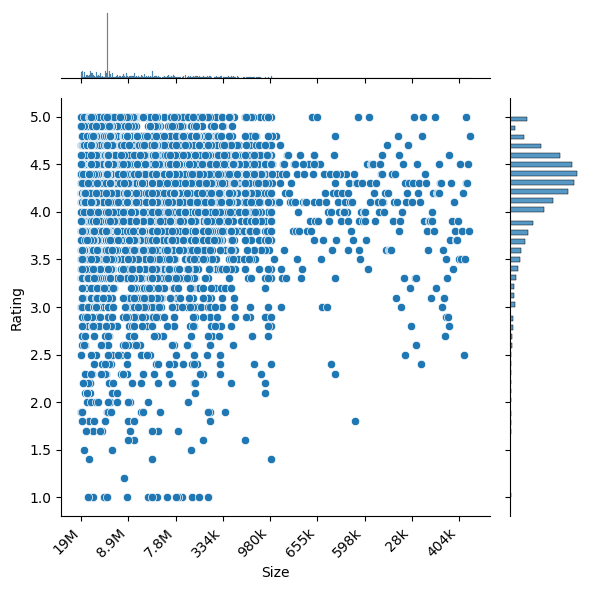

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(16, 10))  # Increase figure size
joint_plot = sns.jointplot(x="Size", y="Rating", data=df, kind="scatter")
# Rotate x-axis labels
plt.setp(joint_plot.ax_joint.get_xticklabels(), rotation=45, ha='right')

# Set the number of ticks on x-axis
joint_plot.ax_joint.xaxis.set_major_locator(plt.MaxNLocator(10))  # Change 10 to the desired number of ticks

# Adjust the subplot layout
plt.tight_layout()

plt.show()


<Figure size 1600x1000 with 0 Axes>

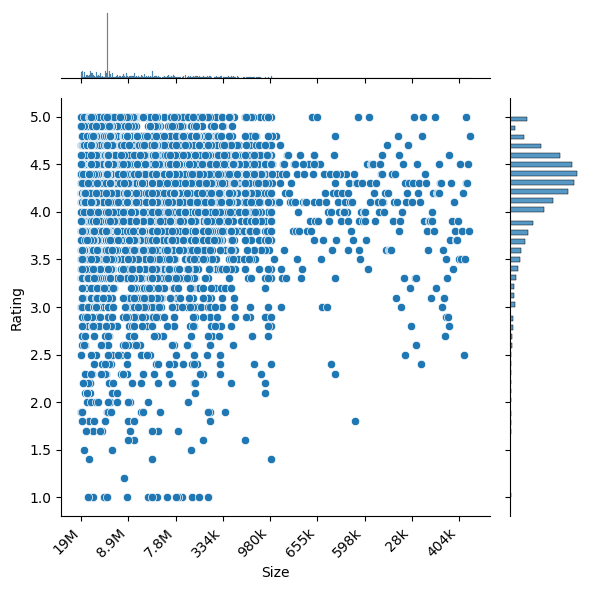

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(16, 10))
joint_plot = sns.jointplot(x="Size", y="Rating", data=df, kind="scatter")
plt.setp(joint_plot.ax_joint.get_xticklabels(), rotation=45, ha='right')
joint_plot.ax_joint.xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.tight_layout()
plt.show()

# b. Do you see any patterns?


Yes, from the given plot, we can say that there is correlation between Size and Rating

# c. How do you explain the pattern?


From the given plot, we can see that, on increase in the Rating, the size also increases and there is positive correlation between Size and Rating

# 8. Effect of price on rating


# a. Make a jointplot (with regression line)


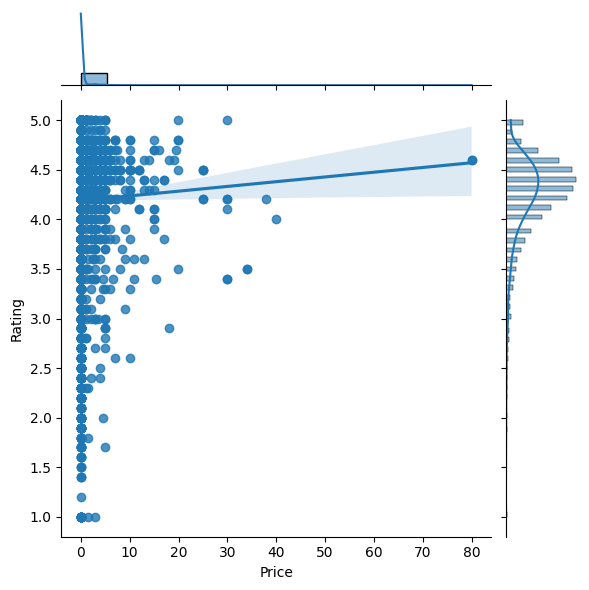

In [61]:
sns.jointplot(x='Price',y='Rating',data=df,kind='reg')
plt.show()

# b. What pattern do you see?


From the given plot, we can say that, on increase in the Price, the Rating remains constant which is greater than 4

# c. How do you explain the pattern?


so we can say that incrsing the price the rating ramins costant which is greteer than 4 and we also say that the weak correlation 
between the reating and price

# so , so we can say that the incesing the price the rating remains constant which gretter than 4 , and we alson say that te weak correlation
betweeen the rating and price 

# d. Replot the data, this time with only records with price > 0


In [62]:
greatervalue = df[df['Price']>0]
greatervalue

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36M,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861k,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


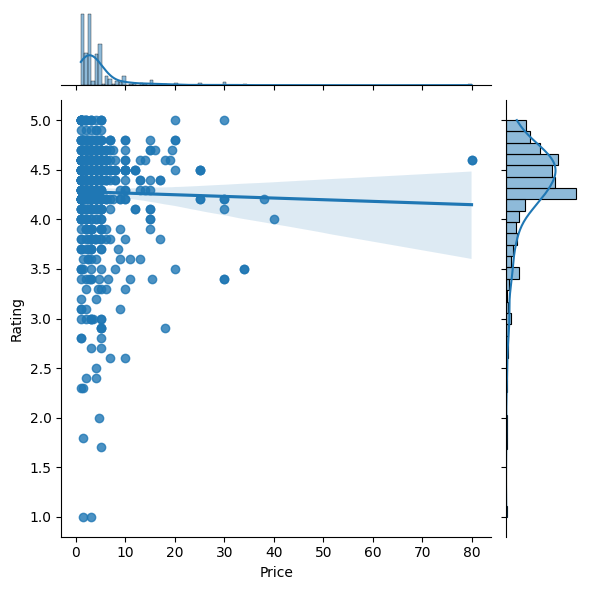

In [63]:
sns.jointplot(x='Price', y='Rating', data=greatervalue ,kind='reg')
plt.show()

# e. Does the pattern change?


Yes, the pattern has changed as we have given the condition to the data as Price>0 so we can say that there is negative correlation between Price and Rating

# f. What is your overall inference on the effect of price on the rating


So, from this we can say that, on increase in the price, it doesn't have any effect on the higher rating and the rating is almost constant which is 4

# 9. Rating vs. content rating

# a. Make a bar plot displaying the rating for each content rating


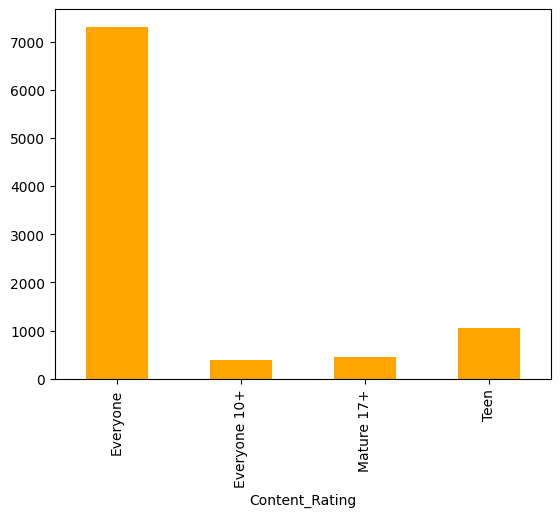

In [64]:
df.groupby(['Content_Rating'])['Rating'].count().plot.bar(color='orange')
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?


Here, we will use Median as we have outlier in the Rating. And, Median is the best measure of central tendency to overcome
the outlier